# Dalhquist's ODE using sequential timestepping

We will solve Dalhquist's model linear ODE using serial timestepping and the implicit theta method.

Dalhquist's test equation is a very simple linear ODE, and is useful for testing and demonstrating time integration methods:

$$
\partial_{t}q(t) = \lambda q(t)
$$

The solutions to this equation are exponentials:

$$
q(t) = q(0)e^{\lambda t}
$$

In general $\lambda$ can be complex. $\lambda=a+ib$ leads to oscillitory solutions with frequency $b$ and a decay rate $a$. For the solution to remain bounded for $t\geq0$ we require $a\leq0$ so that the solution decays.

## Time discretisation

The implicit theta method is a single-step method which includes the first order forward and backward Euler methods, and the second order trapezium rule methods as special cases.

The solution $q$ is discretised in time, with the discrete solution $q^{n}$ approximating $q(n\Delta t)$, where $\Delta t$ is the timestep size. The implicit theta method provides an update from the current timestep $q^{n}$ to the next timestep $q^{n+1}$ by:

$$
\frac{q^{n+1}-q^{n}}{\Delta t} = \theta\lambda q^{n+1} + (1-\theta)\lambda q^{n} 
$$

The time derivative is approximated using simple finite differences, and the right hand side is approximated by a weighted sum of the values at the current and next timestep. When $\theta=0$ we have the explicit forward Euler method, when $\theta=1$ we have the implicit backward Euler method, and when $\theta=0.5$ we have the trapezium rule.

## Implementing the discretisation

Now that we have a timestepping method, we can begin implementing it to find a time series of the solution.
First we define the number of timesteps `nt`, the timestep size `dt`, the theta method parameter `theta`, the initial condition `q0`, and the eigenvalue `lamda`. We choose a $\lambda$ with a small real part so it decays only very gradually. This means that we can solve for longer times without the solution decaying to zero.

In [7]:
nt = 256
dt = 0.25
theta = 0.5

lamda = -0.05 + 0.5j
q0 = 1

Next we set up the array to store the timeseries and set the initial condition.

In [8]:
import numpy as np

q = np.zeros(nt+1, dtype=complex)
q[0] = q0

Next is the timestepping loop. At each iteration `i` we need to calculate the next timestep `q[i+1]` using the current timestep `q[i]`:

In [9]:
for i in range(nt):
    # implement the timestepping iteration here
    # pass
    rhs = (1 + dt*(1-theta)*lamda)*q[i]
    jac = (1 - dt*theta*lamda)
    q[i+1] = rhs/jac

Now we can visualise the evolution of $q$ over time.

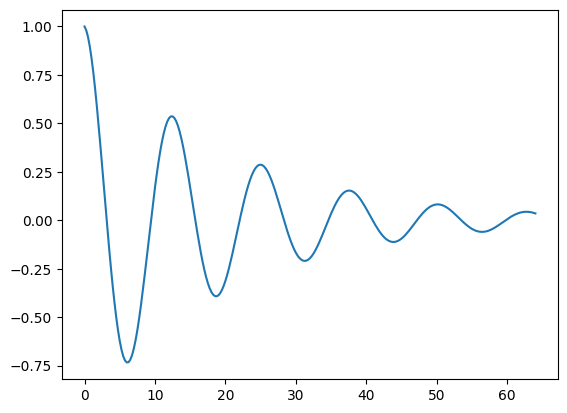

In [10]:
import matplotlib.pyplot as plt

time = np.linspace(0, nt*dt, num=nt+1, endpoint=True)

plt.plot(time, q.real)
plt.show()

We can also look at the evolution on the complex plane.

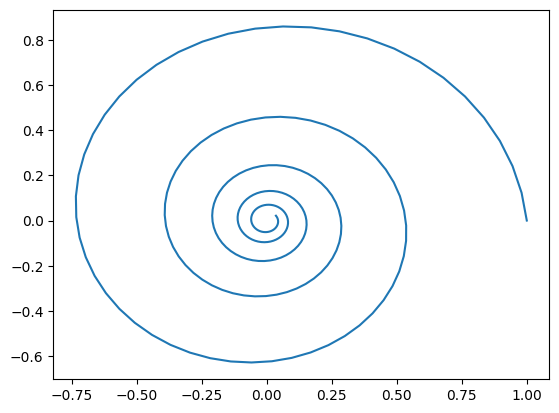

In [11]:
plt.plot(q.real, q.imag)
plt.show()